<a href="https://colab.research.google.com/github/adv555/DataScience/blob/main/SciPy_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import integrate, interpolate
import matplotlib.pyplot as plt

# Task 2

Пусть все население (N индивидов) делится на три группы: индивиды, которые восприимчивы к данной болезни, но здоровы (susceptible) — S(t); зараженные индивиды (infected) — I(t) (они больны сами и являются носителями болезни) и здоровые индивиды, обладающие иммунитетом к данной болезни (recovered) — R(t).\
**`Примем, что`** \

> **S(t)+I(t)+R(t)=N** \

**Числа восприимчивых к болезни индивидов будет пропорционально числу самих восприимчивых индивидов:**

> **dt/dS = −αS**

**Cкорость изменения инфицированных индивидов:** \

> **dt/dI = αS−βI**

**Скорость изменения числа выздоравливающих индивидов:** \

> **dt/dR = βI**

Постоянные пропорциональности **α** и **β** называют коэффициентами заболеваемости и выздоровления соответственно. \
**`Примем, что:`**

1. α = 0.5
2. β = 0.3
3. N = 1 000 000
4. S(0) = 990 000
5. I(0) = 7 000
6. R(0) = 3 000
7. t_0, t_f = 0, 25

**`Необходимо выполнить:`** \
1. Решить дифференциальное уравнение (2) и построить график функции S(t)
2. Решить дифференциальное уравнение (3) и построить график функции I(t)
3. Используя решения уравнений (2) и (3), с помощью уравнения (1), найти решение уравнения (4) (используйте интерполяцию interpid) и построить график функции R(t)
4. Построить все три графика S(t), I(t) и R(t) на одной области отображения

In [2]:
alpha = 0.5
beta = 0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t0, tf = 0, 25

t = np.linspace(t0, tf, 100)

In [5]:
def dsdt(t, s):
    return -alpha * s

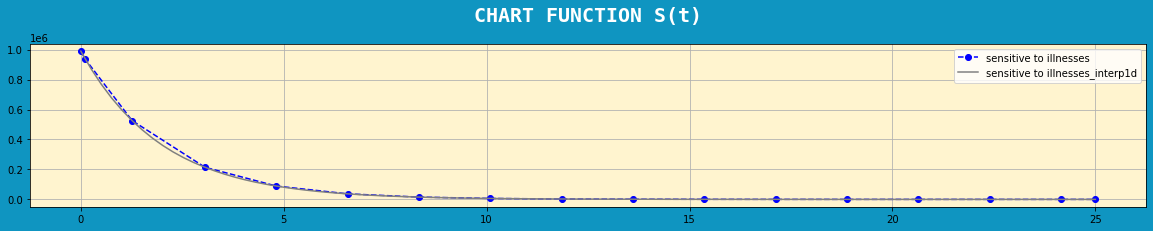

In [47]:
from IPython.lib.display import fsdecode
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

fig.set(facecolor = '#0f95c1')
fig.set_figwidth(20)
ax.set(facecolor = '#fff4cf')
ax.set_title('CHART FUNCTION S(t)', color='white',weight='bold', size=20, family='monospace',  x=0.5, y=1.1)

solve1 = integrate.solve_ivp(dsdt, [t0, tf], [S]) #дифференциальное уравнение первого порядка
t1, y1 = solve1.t, solve1.y[0]
plt.plot(t1, y1, 'o', color='b', label='sensitive to illnesses', linestyle = "--")

fs = interpolate.interp1d(t1, y1, kind='cubic') #одномерная интерполяция функции
plt.plot(t, fs(t), color='grey', label='sensitive to illnesses_interp1d',linestyle = "-");

plt.grid()
plt.legend()
plt.show()

In [24]:
def didt(t, i):
    return alpha * fs(t) - beta * i

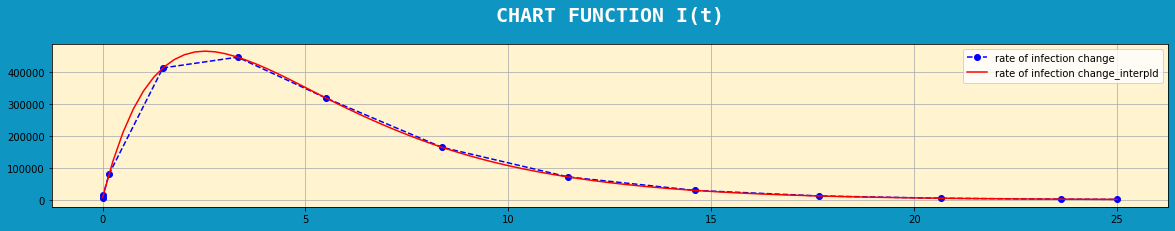

In [45]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

fig.set(facecolor = '#0f95c1')
fig.set_figwidth(20)
ax.set(facecolor = '#fff4cf')
ax.set_title('CHART FUNCTION I(t)', color='white',weight='bold', size=20, family='monospace',  x=0.5, y=1.1)

# solve2 = integrate.solve_ivp(didt, [t0, tf], np.array([I]))
solve2 = integrate.solve_ivp(didt, [t0, tf], [I])
t2, y2 = solve2.t, solve2.y[0]
plt.plot(t2, y2, 'o', color='b', label='rate of infection change', linestyle='--');

fi = interpolate.interp1d(t2, y2, kind='cubic')
plt.plot(t, fi(t), 'r', label='rate of infection change_interpld');

plt.grid()
plt.legend()
plt.show();

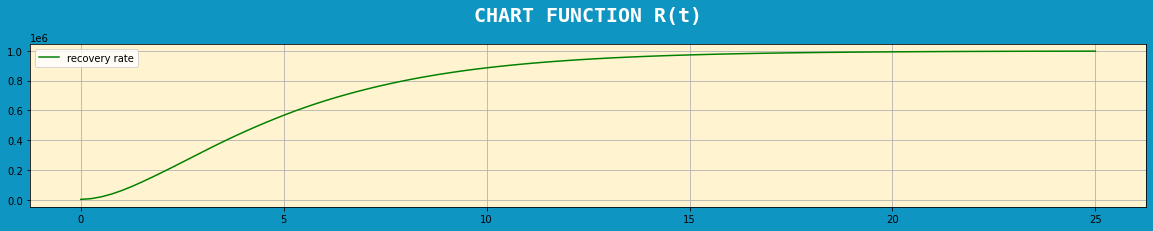

In [43]:
# S(t)+I(t)+R(t) = N
# R(t)=N-S(t)-I(t)
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

fig.set(facecolor = '#0f95c1')
fig.set_figwidth(20)
ax.set(facecolor = '#fff4cf')
ax.set_title('CHART FUNCTION R(t)', color='white',weight='bold', size=20, family='monospace',  x=0.5, y=1.1)

r = N-fs(t)-fi(t)
plt.plot(t,r, color='g', label='recovery rate', linestyle = "-")

plt.grid()
plt.legend()
plt.show();

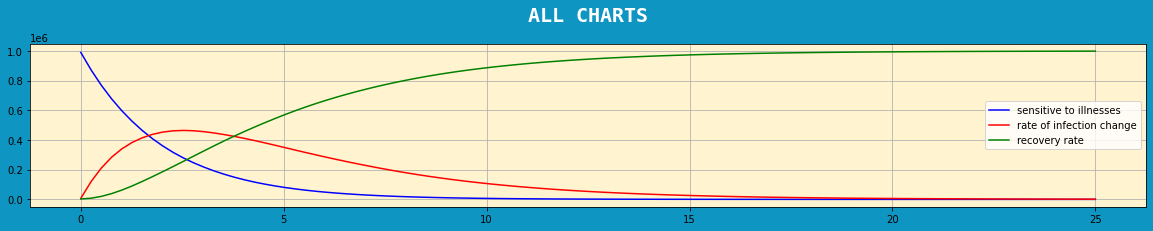

In [48]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

fig.set(facecolor = '#0f95c1')
fig.set_figwidth(20)
ax.set(facecolor = '#fff4cf')
ax.set_title('ALL CHARTS', color='white',weight='bold', size=20, family='monospace',  x=0.5, y=1.1)

plt.plot(t, fs(t), color='b', label='sensitive to illnesses', linestyle = "-")
plt.plot(t, fi(t), color='r', label='rate of infection change', linestyle = "-")
plt.plot(t,r, color='g', label='recovery rate', linestyle = "-")
# plt.plot(t, fs(t), t, fi(t), t, r)

plt.grid()
plt.legend()
plt.show()